# Regresión Lineal: Predicción de Precios de Autos

ML Tarea 1. Integrantes:
Joshua Rivera y Yafar Solano

Una tarea bastante común en el contexto de Machine Learning es la predicción de una variable según algunos descriptores. En esta ocasión partiremos de un dataset que involucra ocho variables (algunas numéricas, otras categóricas) y el precio de un automóvil, el cual se desea estimar empleando un modelo de regresión lineal.

El objetivo de este cuaderno es que usted aprenda:
- Algunas maneras de lidiar con descriptores categóricos no-numéricos.
- Uso de la librería Pandas para manejar datos tabulares en formato .csv.
- Uso de la librería Scikit Learn para preprocesamiento y entrenamiento de un modelo de regresión lineal.
- Funcionamiento e implementación del algoritmo Descenso de Gradiente Estocástico para un modelo lineal básico.

Debe completar las celdas vacías y seguir las instrucciones anotadas en el cuaderno.

La fecha límite de entrega es el día **6 de septiembre** y se realizará a través de Bloque Neón.

In [286]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import sklearn
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split

In [287]:
df = pd.read_csv('carDataset/toyota.csv')
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


In [288]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB


Podemos observar algunas categorías numéricas, y otras de tipo _object_ (string).

In [289]:
categ = ['model','year','transmission','fuelType','engineSize']
str_categ = ['model','transmission','fuelType']
numer = ['price','mileage','tax','mpg']

## Parte 1

A continuación se realizó el ajuste de los datos para un modelo de regresión lineal definido mediante la librería SciKit-Learn. Se observan dos métricas de precisión, en este caso Error Cuadrático Medio (RMSE) y $R^2$ (puede leer más sobre esta métrica en [ScikitLearn: r2_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)). Se le entregarán los dos primeros casos como ejemplo, usted debe implementar los demás a partir de estos primeros.

#### Casos:

- Caso 1: Codificación One-Hot (MinMaxScaler)
- Caso 2: Codificación Ordinal (MinMaxScaler)
- Caso 3: Codificación One-Hot (RobustScaler)
- Caso 4: Codificación Ordinal (RobustScaler)
- Caso 5: Entrenar con un 30% (Codificación Ordinal, MinMaxScaler)
- Caso 6: Entrenar con un 55% (Codificación Ordinal, MinMaxScaler)
- Caso 7: Entrenar con un 80% (Codificación Ordinal, MinMaxScaler)

Analice los resultados.

### Caso 1:

#### Codificación One-Hot

Una de las formas de codificar categorías no numéricas se conoce como _one-hot encoding_, en donde se crea una columna para cada valor distinto que exista en la característica que estamos codificando y, para cada registro, marcar con un 1 la columna a la que pertenezca dicho registro y dejar las demás con 0.

Igualmente, en este caso se realizará un escalamiento de los datos utilizando un `MinMaxScaler`, investigue más sobre esta función en: [ScikitLearn: MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html).

In [290]:
# One Hot code
df_ohe = pd.get_dummies(df)
# Scaling
scaler = MinMaxScaler()
df_scl_ohe = scaler.fit_transform(df_ohe)
df_scl_ohe = pd.DataFrame(df_scl_ohe, columns = df_ohe.columns)

# Visualización
df_scl_ohe.head()

,year,price,mileage,tax,mpg,engineSize,model_ Auris,model_ Avensis,model_ Aygo,model_ C-HR,model_ Camry,model_ Corolla,model_ GT86,model_ Hilux,model_ IQ,model_ Land Cruiser,model_ PROACE VERSO,model_ Prius,model_ RAV4,model_ Supra,model_ Urban Cruiser,model_ Verso,model_ Verso-S,model_ Yaris,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,0.818182,0.256150,0.138100,0.469027,0.143842,0.444444,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.863636,0.256066,0.106716,0.256637,0.143842,0.444444,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.772727,0.222301,0.157479,0.469027,0.143842,0.444444,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.863636,0.306839,0.084476,0.265487,0.143842,0.444444,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.863636,0.281478,0.208019,0.256637,0.143842,0.444444,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


#### Separación de Datos

In [291]:
# Separación de datos para entrenamiento y prueba
X = df_scl_ohe.drop(['price'], axis=1)
y = df_scl_ohe['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

In [292]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

# Ejecución de la regresión lineal
model_1 = LinearRegression()

model_1.fit(X_train, y_train)
preds = model_1.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
rs = model_1.score(X_test, y_test)

# Calculo de rmse y r^2
print(f'RMSE: {round(rmse,3)}')
print(f'R^2: {round(rs,3)}\n')

RMSE: 0.031
R^2: 0.917



Se consiguió un coeficiente de determinación de 0.917, el cual es un muy buen modelo pues entre más cercano a 1 esté, mejor es el ajuste del modelo planteado. Y con un valor de RMSE de 0.031 se sabe que es el error mas bajo presentado en los casos realizados.

### Caso 2

#### Codificación Ordinal

In [293]:
# Ordinal code
oe = OrdinalEncoder()
df_oe = df.copy()
df_oe[str_categ] = oe.fit_transform(df_oe[str_categ])

# Scaling
x = df_oe.values #returns a numpy array
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_scl_oe = pd.DataFrame(x_scaled, columns=df_oe.columns)
# Visualización
df_scl_oe.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,0.352941,0.818182,0.256150,0.333333,0.138100,1.0,0.469027,0.143842,0.444444
1,0.352941,0.863636,0.256066,0.333333,0.106716,1.0,0.256637,0.143842,0.444444
2,0.352941,0.772727,0.222301,0.333333,0.157479,1.0,0.469027,0.143842,0.444444
3,0.352941,0.863636,0.306839,0.333333,0.084476,1.0,0.265487,0.143842,0.444444
4,0.352941,0.863636,0.281478,0.333333,0.208019,1.0,0.256637,0.143842,0.444444


#### Separación de Datos

In [294]:
# Separación de datos para entrenamiento y prueba
X = df_scl_oe.drop(['price'], axis=1)
y = df_scl_oe['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

In [295]:
# Ejecución de la regresión lineal
model_2 = LinearRegression()

model_2.fit(X_train, y_train)
preds = model_2.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
rs = model_2.score(X_test, y_test)
print(f'RMSE: {round(rmse,3)}')
print(f'R^2: {round(rs,3)}\n')

RMSE: 0.05
R^2: 0.787



El valor de RMSE sigue siendo bastante bajo, pues está en un factor de 10^-2. El valor de R2 sigue siendo alto aún cercano a 1, y al parecer es bastante alto para este modelo con un 80% de datos en prueba se consigue un total de 0.787 en el coeficiente de determinación.

### Caso 3

#### Codificación One-Hot

In [296]:
# One Hot code
df_ohe_3 = pd.get_dummies(df)
# Scaling
scaler = RobustScaler()
df_scl_ohe_3 = scaler.fit_transform(df_ohe_3)
df_scl_ohe_3 = pd.DataFrame(df_scl_ohe_3, columns = df_ohe_3.columns)
# Visualización
df_scl_ohe_3.head()

,year,price,mileage,tax,mpg,engineSize,model_ Auris,model_ Avensis,model_ Aygo,model_ C-HR,model_ Camry,model_ Corolla,model_ GT86,model_ Hilux,model_ IQ,model_ Land Cruiser,model_ PROACE VERSO,model_ Prius,model_ RAV4,model_ Supra,model_ Urban Cruiser,model_ Verso,model_ Verso-S,model_ Yaris,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,-0.5,0.776286,0.257936,0.896552,-1.955882,0.625,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.775541,0.004718,0.068966,-1.955882,0.625,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.0,0.477703,0.414289,0.896552,-1.955882,0.625,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.223415,-0.174718,0.103448,-1.955882,0.625,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.999702,0.822056,0.068966,-1.955882,0.625,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Separación de Datos

In [297]:
# Separación de datos para entrenamiento y prueba
X_3 = df_scl_ohe_3.drop(['price'], axis=1)
y_3 = df_scl_ohe_3['price']
X_3_train, X_3_test, y_3_train, y_3_test = train_test_split(X_3, y_3, test_size=0.2, random_state=22)

In [298]:
# Ejecución de la regresión lineal
model_3 = LinearRegression()

model_3.fit(X_3_train, y_3_train)
preds = model_3.predict(X_3_test)
rmse = np.sqrt(mean_squared_error(y_3_test, preds))
rs = model_3.score(X_3_test, y_3_test)
print(f'RMSE: {round(rmse,3)}')
print(f'R^2: {round(rs,3)}\n')

RMSE: 0.277
R^2: 0.917



El valor de RMSE aumentó en este caso a 0.277 lo cual puede deberse al nuevo modo de scaling. El valor de R2 sigue siendo alto aún cercano a 1, y al parecer es bastante alto para este modelo con un 80% de datos en prueba se consigue un total de 0.917 en el coeficiente de determinación.

### Caso 4

#### Codificación Ordinal

In [299]:
# Ordinal code
oe = OrdinalEncoder()
df_oe_4 = df.copy()
df_oe_4[str_categ] = oe.fit_transform(df_oe_4[str_categ])

# Scaling
x_4 = df_oe_4.values #returns a numpy array
scaler = RobustScaler()
x_scaled_4 = scaler.fit_transform(x_4)
df_scl_oe_4 = pd.DataFrame(x_scaled_4, columns=df_oe_4.columns)
# Visualización
df_scl_oe_4.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,0.066667,-0.5,0.776286,0.0,0.257936,0.0,0.896552,-1.955882,0.625
1,0.066667,0.0,0.775541,0.0,0.004718,0.0,0.068966,-1.955882,0.625
2,0.066667,-1.0,0.477703,0.0,0.414289,0.0,0.896552,-1.955882,0.625
3,0.066667,0.0,1.223415,0.0,-0.174718,0.0,0.103448,-1.955882,0.625
4,0.066667,0.0,0.999702,0.0,0.822056,0.0,0.068966,-1.955882,0.625


#### Separación de Datos

In [300]:
# Separación de datos para entrenamiento y prueba
X_4 = df_scl_oe_4.drop(['price'], axis=1)
y_4 = df_scl_oe_4['price']
X_4_train, X_4_test, y_4_train, y_4_test = train_test_split(X_4, y_4, test_size=0.2, random_state=22)

In [301]:
# Ejecución de la regresión lineal
model_4 = LinearRegression()

model_4.fit(X_4_train, y_4_train)
preds = model_4.predict(X_4_test)
rmse = np.sqrt(mean_squared_error(y_4_test, preds))
rs = model_4.score(X_4_test, y_4_test)
print(f'RMSE: {round(rmse,3)}')
print(f'R^2: {round(rs,3)}\n')

RMSE: 0.444
R^2: 0.787



El valor de RMSE aumentó en este caso a 0.444 lo cual puede deberse al nuevo modo de scaling. El valor de R2 sigue siendo alto aún cercano a 1, y al parecer es bastante alto para este modelo con un 80% de datos en prueba se consigue un total de 0.787 en el coeficiente de determinación.

### Caso 5

#### Codificación Ordinal

In [302]:
# Ordinal code
oe = OrdinalEncoder()
df_oe = df.copy()
df_oe[str_categ] = oe.fit_transform(df_oe[str_categ])

# Scaling
x = df_oe.values #returns a numpy array
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_scl_oe = pd.DataFrame(x_scaled, columns=df_oe.columns)
# Visualización
df_scl_oe.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,0.352941,0.818182,0.256150,0.333333,0.138100,1.0,0.469027,0.143842,0.444444
1,0.352941,0.863636,0.256066,0.333333,0.106716,1.0,0.256637,0.143842,0.444444
2,0.352941,0.772727,0.222301,0.333333,0.157479,1.0,0.469027,0.143842,0.444444
3,0.352941,0.863636,0.306839,0.333333,0.084476,1.0,0.265487,0.143842,0.444444
4,0.352941,0.863636,0.281478,0.333333,0.208019,1.0,0.256637,0.143842,0.444444


#### Separación de Datos

In [303]:
# Separación de datos para entrenamiento y prueba
X = df_scl_oe.drop(['price'], axis=1)
y = df_scl_oe['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, random_state=22)

# Ejecución de la regresión lineal
model_5 = LinearRegression()

model_5.fit(X_train, y_train)
preds = model_5.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
rs = model_5.score(X_test, y_test)
print(f'RMSE: {round(rmse,3)}')
print(f'R^2: {round(rs,3)}\n')

RMSE: 0.049
R^2: 0.785



El valor de RMSE bajó a 0.049, por lo que el scaling usado de minmax puede afectar a este error, además el valor de R2 sigue siendo alto aún cercano a 1, y al parecer es bastante alto para este modelo con un 30% de datos de entrenamiento se consigue un total de 0.785 en el coeficiente de determinación.

### Caso 6

#### Codificación Ordinal

In [304]:
# Ordinal code
oe = OrdinalEncoder()
df_oe = df.copy()
df_oe[str_categ] = oe.fit_transform(df_oe[str_categ])

# Scaling
x = df_oe.values #returns a numpy array
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_scl_oe = pd.DataFrame(x_scaled, columns=df_oe.columns)
# Visualización
df_scl_oe.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,0.352941,0.818182,0.256150,0.333333,0.138100,1.0,0.469027,0.143842,0.444444
1,0.352941,0.863636,0.256066,0.333333,0.106716,1.0,0.256637,0.143842,0.444444
2,0.352941,0.772727,0.222301,0.333333,0.157479,1.0,0.469027,0.143842,0.444444
3,0.352941,0.863636,0.306839,0.333333,0.084476,1.0,0.265487,0.143842,0.444444
4,0.352941,0.863636,0.281478,0.333333,0.208019,1.0,0.256637,0.143842,0.444444


#### Separación de Datos

In [305]:
# Separación de datos para entrenamiento y prueba
X = df_scl_oe.drop(['price'], axis=1)
y = df_scl_oe['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.55, random_state=22)

# Ejecución de la regresión lineal
model_6 = LinearRegression()

model_6.fit(X_train, y_train)
preds = model_6.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
rs = model_6.score(X_test, y_test)
print(f'RMSE: {round(rmse,3)}')
print(f'R^2: {round(rs,3)}\n')

RMSE: 0.05
R^2: 0.784



El valor de RMSE sigue en a 0.05, por lo que el scaling usado de minmax puede afectar a disminuir este error, además el valor de R2 sigue siendo alto aún cercano a 1, y al parecer es bastante alto para este modelo con un 55% de datos de entrenamiento se consigue un total de 0.784 en el coeficiente de determinación.

### Caso 7

#### Codificación Ordinal

In [306]:
# Ordinal code
oe = OrdinalEncoder()
df_oe = df.copy()
df_oe[str_categ] = oe.fit_transform(df_oe[str_categ])

# Scaling
x = df_oe.values #returns a numpy array
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_scl_oe = pd.DataFrame(x_scaled, columns=df_oe.columns)
# Visualización
df_scl_oe.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,0.352941,0.818182,0.256150,0.333333,0.138100,1.0,0.469027,0.143842,0.444444
1,0.352941,0.863636,0.256066,0.333333,0.106716,1.0,0.256637,0.143842,0.444444
2,0.352941,0.772727,0.222301,0.333333,0.157479,1.0,0.469027,0.143842,0.444444
3,0.352941,0.863636,0.306839,0.333333,0.084476,1.0,0.265487,0.143842,0.444444
4,0.352941,0.863636,0.281478,0.333333,0.208019,1.0,0.256637,0.143842,0.444444


#### Separación de Datos

In [307]:
# Separación de datos para entrenamiento y prueba
X = df_scl_oe.drop(['price'], axis=1)
y = df_scl_oe['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.8 , random_state=22)

# Ejecución de la regresión lineal
model_7 = LinearRegression()

model_7.fit(X_train, y_train)
preds = model_7.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
rs = model_7.score(X_test, y_test)
print(f'RMSE: {round(rmse,3)}')
print(f'R^2: {round(rs,3)}\n')

RMSE: 0.05
R^2: 0.787



Finalmente, el valor de RMSE continua en 0.05, además el valor de R2 sigue siendo alto aún cercano a 1, y al parecer es bastante alto para este modelo con un 80% de datos de entrenamiento se consigue un total de 0.787 en el coeficiente de determinación. Se observan muy lijeros cambios en relación a usar el 55% de los datos, por lo que se puede decir que el modelo de regresión lineal se estabiliza rapido con cierta cantidad minima de datos.

## Parte 2

Ahora usted debe desarrollar su propia implementación del método Descenso de Gradiente estocástico. Para esta ocasión debe utilizar una codificación One-Hot, un RobustScaler y realizar el entrenamiento a partir del 80% de los datos. Al final del entrenamiento, en la lista `errores` se deben tener los valores de la función de error para cada iteración y así poder observar el progreso gráficamente.

In [308]:
df_ohe = pd.get_dummies(df)
scaler = RobustScaler()
df_scl_ohe = scaler.fit_transform(df_ohe)
df_scl_ohe = pd.DataFrame(df_scl_ohe, columns = df_ohe.columns)

X = df_scl_ohe.drop(['price'], axis=1)
y = df_scl_ohe['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)
print(X_train)

      year   mileage  ...  fuelType_Other  fuelType_Petrol
856   -1.5  0.834592  ...             0.0              0.0
4709  -1.0  0.808919  ...             0.0              0.0
2028   0.5 -0.178464  ...             0.0              0.0
3295   0.5  0.044686  ...             0.0              0.0
924    0.0  0.035711  ...             0.0              0.0
...    ...       ...  ...             ...              ...
5478   0.0 -0.159036  ...             0.0              0.0
356    1.0 -0.531785  ...             0.0             -1.0
4908  -0.5  0.210059  ...             0.0              0.0
6276   0.0  0.966289  ...             0.0             -1.0
2933  -1.5  0.475905  ...             0.0              0.0

[5390 rows x 31 columns]


In [309]:
X_train_array = np.c_[np.ones(X_train.values.shape[0]), X_train.values]
y_train_array = y_train.values
X_test_array = np.c_[np.ones(X_test.values.shape[0]), X_test.values]
y_test_array = y_test.values

# Se obtiene el número de categorías, que representa la dimensión del vector de pesos W.
N = X_train_array[1].shape[0]

#Selección de par aleatorio
i = int(np.random.rand()*N) # Posición aleatoria #
xActual = X_train_array[i]
yActual = y_train_array[i]

#Inicialización de los valores de la tasa de aprendizaje 
tasa = np.linspace(1, 10000, 50, endpoint=True)/10000 
k = len(tasa)
vTasas = []
mErrores = []
mWs = []

# Ciclo iterativo para evaluar cada tasa de aprendizaje
for j in range(k):

  #Inicialización de w
  w0 = np.random.rand(N, 1) # Inicializar aleatoriamente #
  w = np.transpose(w0.copy())

  #Inicialización de criterio de parada
  eps = 1e-3 # Se define un criterio de parada basado en el error en la predicción #
  error = float('inf') # Valor inicial, se debe actualizar en cada iteración #
  dif = float('inf') # Diferencia entre vectores de pesos w consecutivos #

  #Lista para monitorear aprendizaje
  errores = [] # Agregar a esta lista los valores de la función de error en cada iteración #
  gradE = float('inf') # Multiplicación entre el error y el X actual
  
  # Variable para acumular el número de iteraciones del algoritmo por cada tasa
  nIter = 0

  #Ciclo iterativo según algoritmo de descenso de gradiente
  while dif > eps or np.linalg.norm(gradE) > eps :
    
    # Desarrollo de algoritmo #
    g = w @ xActual
    e = g - yActual
    wfut = w - (tasa[j] * e * xActual)
    
    # Cálculo de errores
    dif = np.linalg.norm(wfut - w)
    gradE = e * xActual
    error = (1/2)*np.sum(w @ np.transpose(X_train_array) - y_train_array)**2
    errores.append(error)

    # Actualizar w, x, y
    w = wfut
    i = int(np.random.rand()*N) # Posición aleatoria #
    xActual = X_train_array[i]
    yActual = y_train_array[i]

    # Actualizar el número de iteraciones
    nIter += 1

    # Almacenar la tasa si el número de iteraciones es menor a 500
  if tasa[j] < 0.8 and nIter < 1500:
    vTasas.append(tasa[j])
    mErrores.append(errores)
    mWs.append(w)
print(len(vTasas))

for j in range(len(vTasas)):
  print(j, 'Iteraciones', len(mErrores[j]),' \t Tasa:', vTasas[j])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:50: RuntimeWarning: overflow encountered in multiply
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: RuntimeWarning: overflow encountered in matmul
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: overflow encountered in matmul
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:50: Run

12
0 Iteraciones 201  	 Tasa: 0.02050612244897959
1 Iteraciones 951  	 Tasa: 0.04091224489795918
2 Iteraciones 544  	 Tasa: 0.06131836734693877
3 Iteraciones 510  	 Tasa: 0.08172448979591836
4 Iteraciones 709  	 Tasa: 0.10213061224489796
5 Iteraciones 127  	 Tasa: 0.12253673469387755
6 Iteraciones 404  	 Tasa: 0.14294285714285712
7 Iteraciones 682  	 Tasa: 0.16334897959183672
8 Iteraciones 596  	 Tasa: 0.18375510204081633
9 Iteraciones 23  	 Tasa: 0.2041612244897959
10 Iteraciones 1427  	 Tasa: 0.7755326530612244
11 Iteraciones 1482  	 Tasa: 0.7959387755102041


#### Evaluación de Modelo

In [310]:
from sklearn.metrics import r2_score

# Imprimir el R2 para los datos de entrenamiento y prueba por cada tasa 
for p in range(len(vTasas)):
  y_train_preds = np.zeros(y_train_array.shape)
  for i in range(X_train_array.shape[0]):
      y_train_preds[i] = np.dot(mWs[p],X_train_array[i])

  y_test_preds = np.zeros(y_test_array.shape)
  for i in range(X_test_array.shape[0]):
      y_test_preds[i] = np.dot(mWs[p],X_test_array[i])
  
  # Esta condición evita los elementos tipo NaN y permite evaluar el R2 para las tasas seleccionadas.
  if not np.isnan(y_test_preds[0]):
    r2_train = r2_score(y_train_array, y_train_preds)
    r2_test = r2_score(y_test_array, y_test_preds)
    print(f'R2 entrenamiento tasa {p+1}: {round(r2_train,4)}\nR2 prueba tasa {p+1}: {round(r2_test,4)}')
    print('\n')

R2 entrenamiento tasa 1: 0.4884
R2 prueba tasa 1: 0.4582


R2 entrenamiento tasa 2: 0.736
R2 prueba tasa 2: 0.7169


R2 entrenamiento tasa 3: 0.6677
R2 prueba tasa 3: 0.6517


R2 entrenamiento tasa 4: 0.7352
R2 prueba tasa 4: 0.7311


R2 entrenamiento tasa 5: 0.683
R2 prueba tasa 5: 0.6577


R2 entrenamiento tasa 6: 0.4798
R2 prueba tasa 6: 0.4476


R2 entrenamiento tasa 7: 0.6713
R2 prueba tasa 7: 0.6343


R2 entrenamiento tasa 8: 0.6997
R2 prueba tasa 8: 0.6889


R2 entrenamiento tasa 9: 0.7598
R2 prueba tasa 9: 0.7369


R2 entrenamiento tasa 10: -0.4372
R2 prueba tasa 10: -0.4562




## Gráfica de Resultados

Text(0.5, 1.0, 'Descenso de Gradiente Estocástico')

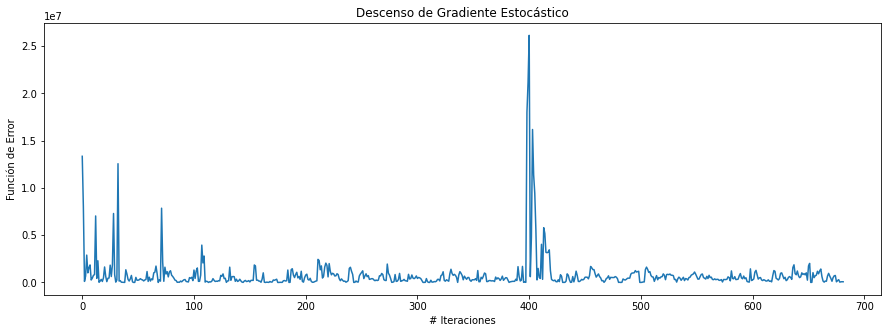

In [311]:
plt.figure(figsize=(15,5))
# La matriz mErrores contiene en cada una de sus columnas el vector de error asociado a la tasa evaluada.
# Ahora mismo se está graficando el error asociado a la mejor tasa encontrada.
plt.plot(mErrores[7])
plt.xlabel('# Iteraciones')
plt.ylabel('Función de Error')
plt.title('Descenso de Gradiente Estocástico')

La función de error que se está graficando es la descrita como $$ \nabla E(w) = \frac{1}{2} * \sum (w*x\_train - y\_train)^2 $$ Con el objetivo de que en cada iteración se evalue w en todos los datos de entrenamiento para ser observado el error cuadratico.

Después de varios intentos, se encontró una tasa de aprendizaje con valor de 0.143 que minimizaba tanto el error cuadrático medio como el número de iteraciones del algoritmo de mejor forma. El R2 asociado a los datos de salida de entrenamiento y de prueba para esta tasa presentó el valor más cercano a uno entre todas las tasas que fueron evaluadas y filtradas por medio del código desarrollado, estos valores de R2 fueron respectivamente 0.79 y 0.77. 
Además aprendimos que la letra griega de gradiente es un arpa.